<a href="https://colab.research.google.com/github/KenDaupsey/Multilevel-Hierarchical-modeling-Using-Python/blob/main/Multilevel_Hierarchical_modeling_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Multilevel/Hierarchical Modeling Using Python***

In [1]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
### Load Dataset
url= ("https://raw.githubusercontent.com/KenDaupsey/Multilevel-Hierarchical-modeling-Using-Python/main/hsb2%7Edata.csv")
df= pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [3]:
### List Column (Variable) Names
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.00,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.00,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.00,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.00,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.00,71.0


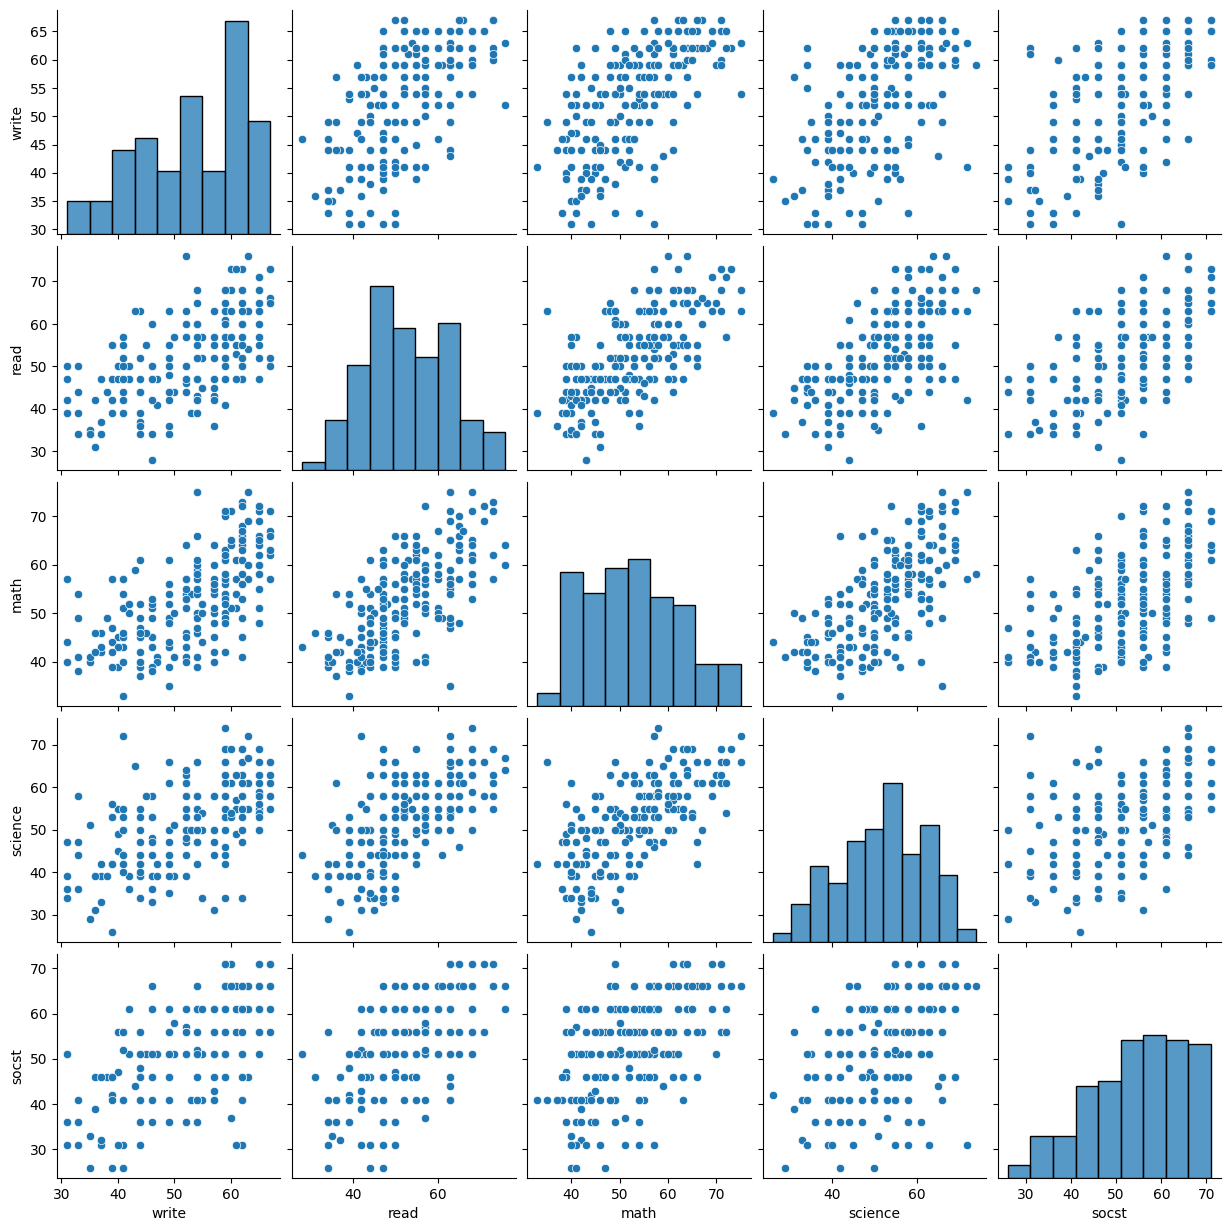

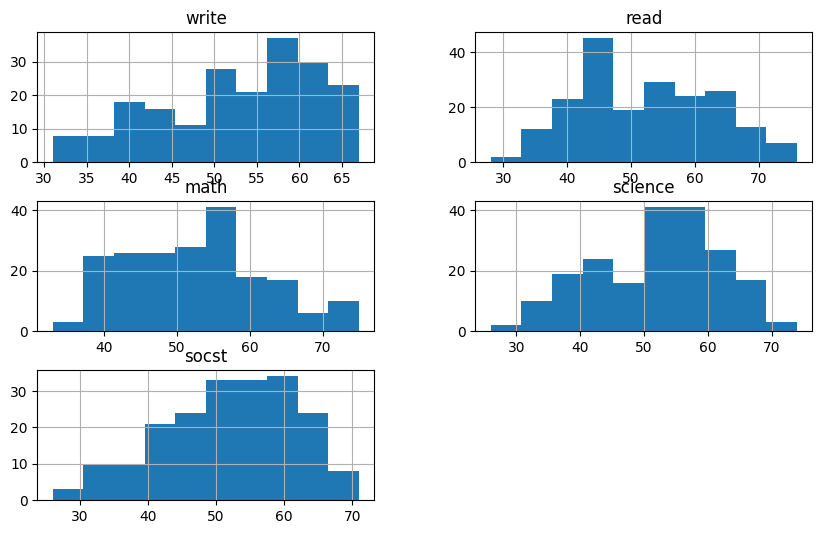

In [6]:
###  Distribution of Variables:

import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot to visualize relationships between variables
sns.pairplot(df[["write", "read", "math", "science", "socst"]])
plt.show()

# Explore individual variable distributions with histograms
df[["write", "read", "math", "science", "socst"]].hist(figsize=(10, 6))
plt.xlabel("Variable Score")
plt.ylabel("Frequency")
plt.subplots_adjust(bottom=0.1)  # Adjust spacing to avoid overlapping labels
plt.show()

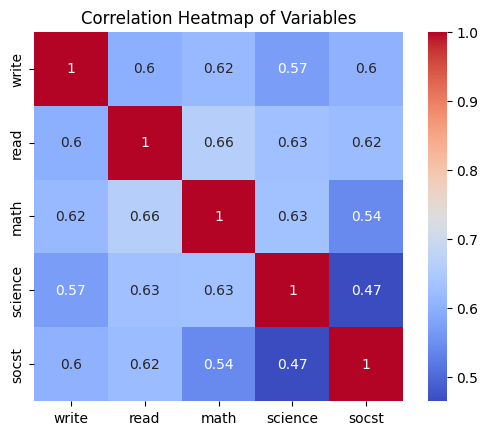

In [7]:
### Correlation Heatmap:
# Calculate correlation matrix
corr = df[['write', 'read', 'math', 'science', 'socst']].corr()

# Plot correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Variables')
plt.show()

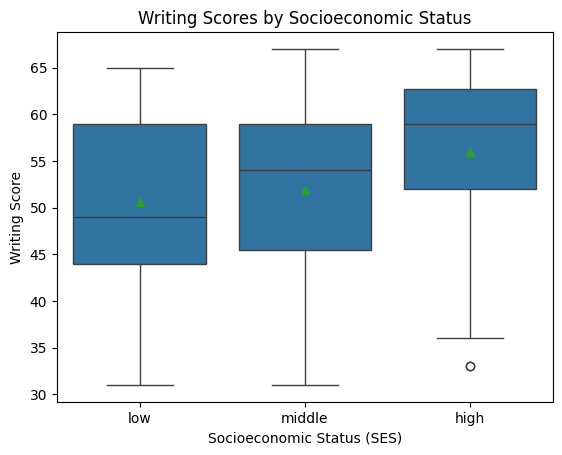

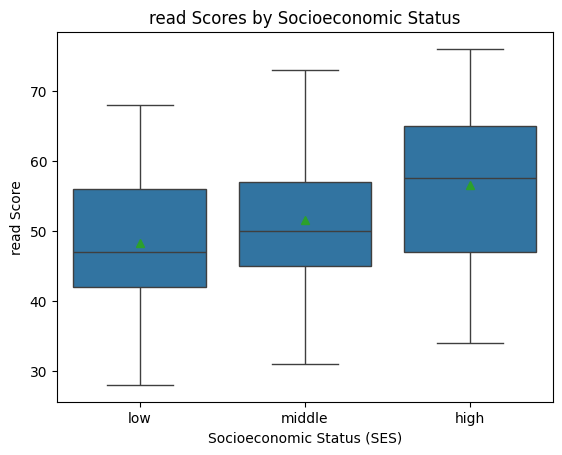

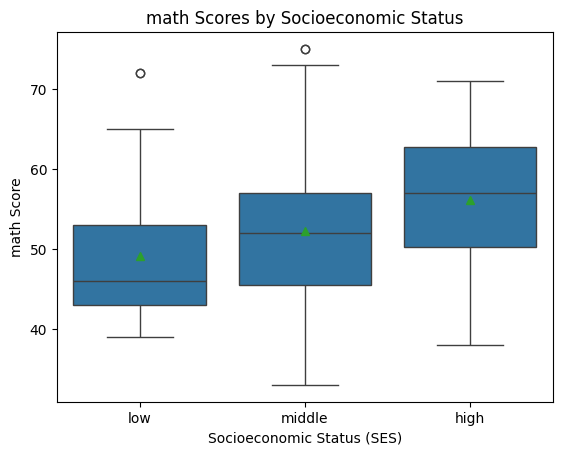

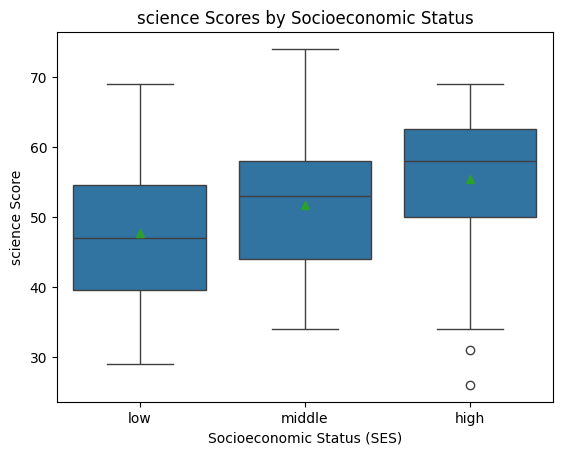

In [8]:
###Boxplots by Socioeconomic Status:
### This visualizes how scores differ across socioeconomic groups.
sns.boxplot(
    x = "ses",
    y = "write",
    showmeans=True,
    data=df
)
plt.xlabel("Socioeconomic Status (SES)")
plt.ylabel("Writing Score")
plt.title("Writing Scores by Socioeconomic Status")
plt.show()

# Repeat for other score variables
for col in ["read", "math", "science"]:
  sns.boxplot(
      x = "ses",
      y = col,
      showmeans=True,
      data=df
  )
  plt.xlabel("Socioeconomic Status (SES)")
  plt.ylabel(f"{col} Score")
  plt.title(f"{col} Scores by Socioeconomic Status")
  plt.show()

In [9]:
# Define the model with "ses" (Socioeconomic Status) as the grouping variable and specify the optimization method
model = sm.MixedLM.from_formula("write ~ read + math + science + socst", data=df, groups=df["ses"])

# Fit the model with the 'powell' optimization method
result = model.fit(method='powell')

# Display the summary
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: write    
No. Observations: 200     Method:             REML     
No. Groups:       3       Scale:              43.8206  
Min. group size:  47      Log-Likelihood:     -667.0613
Max. group size:  95      Converged:          Yes      
Mean group size:  66.7                                 
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  9.803     3.100  3.162  0.002   3.726  15.880
read       0.109     0.071  1.542  0.123  -0.030   0.249
math       0.252     0.073  3.437  0.001   0.108   0.396
science    0.191     0.066  2.881  0.004   0.061   0.320
socst      0.270     0.058  4.643  0.000   0.156   0.384
Group Var  0.187     0.148                              



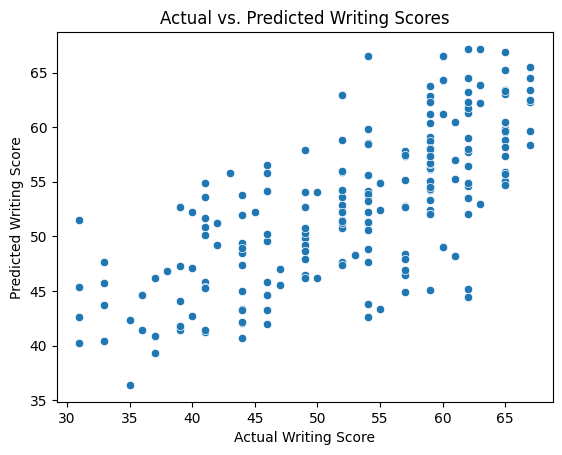

In [10]:
### Predicted vs. Actual Values:
### This helps assess how well the model predicts writing scores based on other factors.

# Add a column for predicted values based on the fitted model
df["predicted_write"] = result.predict(df)

sns.scatterplot(x="write", y="predicted_write", data=df)
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs. Predicted Writing Scores")
plt.show()

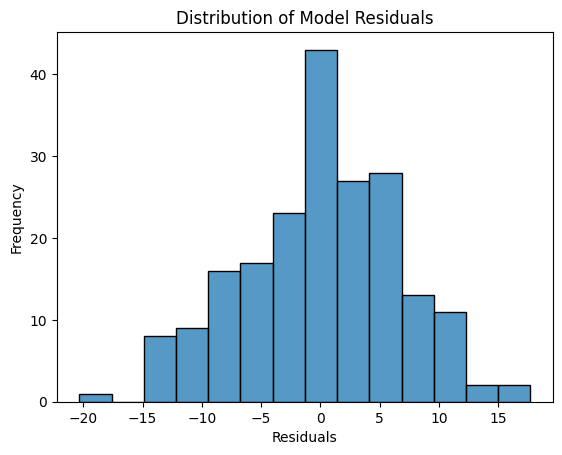

In [11]:
### Residual Plots
###This helps check for model assumptions and potential issues like outliers.

# Explore distribution of residuals
sns.histplot(result.resid)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Model Residuals")
plt.show()

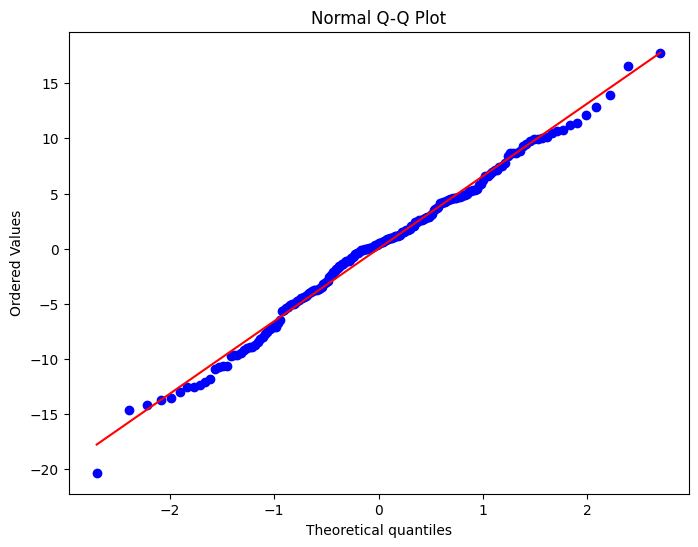

In [12]:
# QQ Plot (Normality Check)
import scipy.stats as stats
import numpy as np

residuals = result.resid
fig = plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

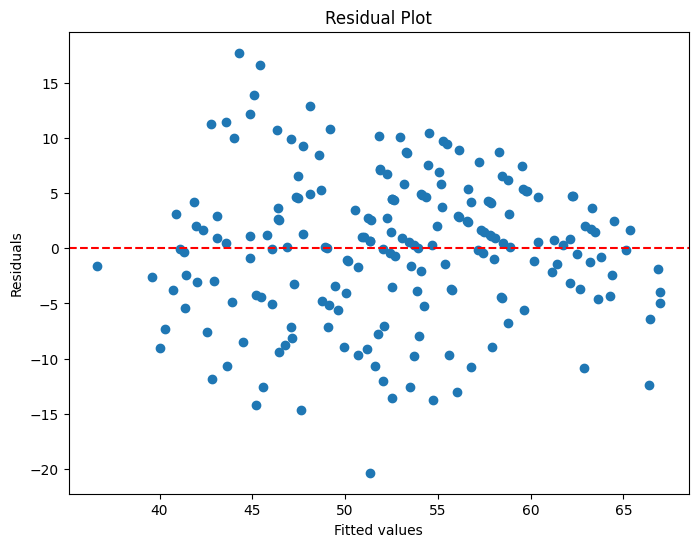

In [13]:
# Plot residuals vs fitted values
#import matplotlib.pyplot as plt

# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Figure size 1000x600 with 0 Axes>

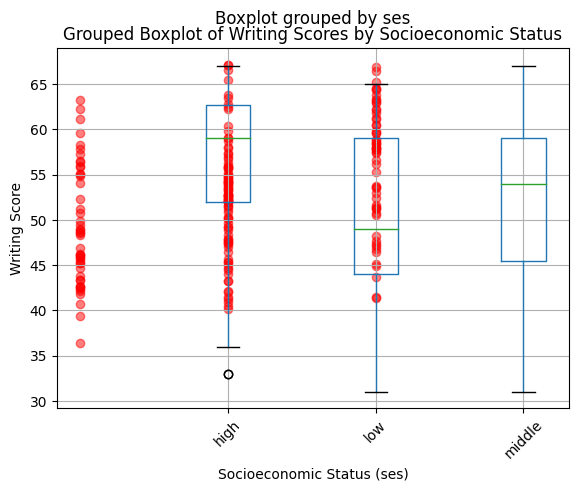

In [14]:
# Grouped Boxplot for Write Variable
df['Predicted'] = result.predict()
plt.figure(figsize=(10, 6))
df.boxplot(column=['write'], by='ses')
plt.scatter(df['ses'], df['Predicted'], color='red', alpha=0.5)
plt.title("Grouped Boxplot of Writing Scores by Socioeconomic Status")
plt.xlabel("Socioeconomic Status (ses)")
plt.ylabel("Writing Score")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

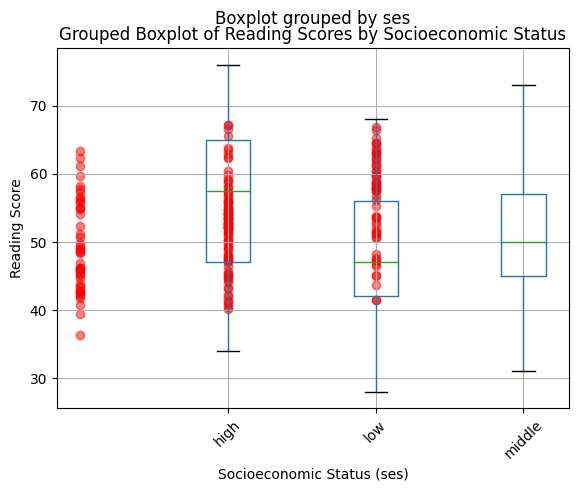

In [15]:
# Grouped Boxplot for Read Variable
df['Predicted'] = result.predict()
plt.figure(figsize=(10, 6))
df.boxplot(column=['read'], by='ses')
plt.scatter(df['ses'], df['Predicted'], color='red', alpha=0.5)
plt.title("Grouped Boxplot of Reading Scores by Socioeconomic Status")
plt.xlabel("Socioeconomic Status (ses)")
plt.ylabel("Reading Score")
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-62b65727b39c>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


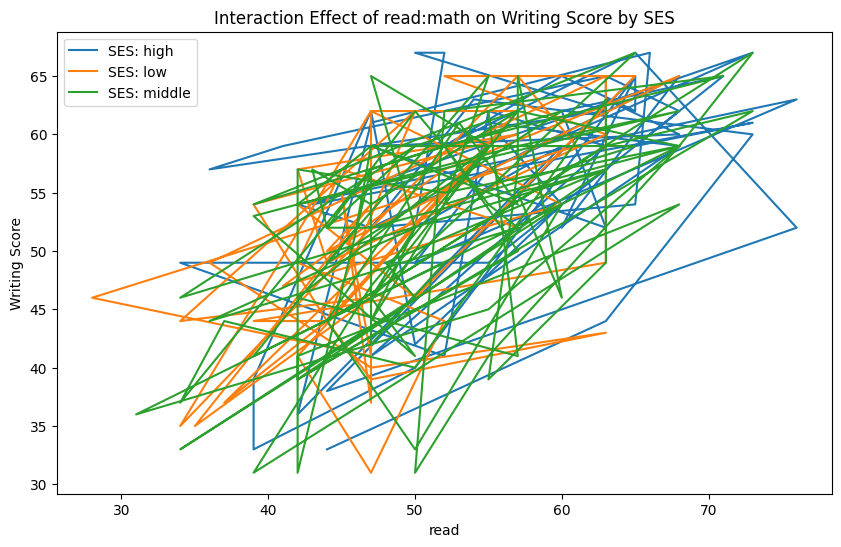

In [16]:
### Interraction!!! Perplexity
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Define the interaction terms (replace 'read' and 'math' with your desired variables)
interaction_terms = ["read:math"]

# Function to plot interaction effects
def plot_interaction(term, df, figsize=(10, 6)):
    plt.figure(figsize=figsize)

    # Get unique values of grouping variable (SES) and sort
    ses_levels = df["ses"].unique()
    ses_levels.sort()  # Sort the unique values

    # Define colormap for multiple lines
    cmap = cm.get_cmap('tab10')

    # Loop through unique SES levels and plot lines
    for i, ses_level in enumerate(ses_levels):
        subset = df[df["ses"] == ses_level]
        plt.plot(subset["read"], subset["write"], label=f"SES: {ses_level}", color=cmap(i))

    # Add labels and title
    plt.xlabel(term.split(":")[0])
    plt.ylabel("Writing Score")
    plt.title(f"Interaction Effect of {term} on Writing Score by SES")
    plt.legend()
    plt.show()

# Call the function for each interaction term
for term in interaction_terms:
    plot_interaction(term, df.copy())

*** The End ***